In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool
from bokeh.models import Span

In [10]:
disney_full = pd.read_csv('DIS.csv')

In [11]:
disney_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-02,1.233125,1.238263,1.233125,1.235694,0.873995,1707856
1,1985-01-03,1.233125,1.233125,1.222849,1.225418,0.866726,11901470
2,1985-01-04,1.222849,1.222849,1.217711,1.220280,0.863092,3323264
3,1985-01-07,1.225418,1.243401,1.225418,1.235694,0.873995,3381652
4,1985-01-08,1.235694,1.245970,1.230556,1.243401,0.879445,2997263


In [12]:
disney = disney_full[['Date', 'Close']]
disney.Date = pd.to_datetime(disney.Date)
disney['Year'] = pd.DatetimeIndex(disney['Date']).year
disney['t'] = np.arange(1, disney.shape[0] + 1)
disney.head()

C:\Users\PC6\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\PC6\AppData\Local\Temp/ipykernel_14700/1608760678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['Year'] = pd.DatetimeIndex(disney['Date']).year
C:\Users\PC6\AppData\Local\Temp/ipykernel_14700/1608760678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Date,Close,Year,t
0,1985-01-02,1.235694,1985,1
1,1985-01-03,1.225418,1985,2
2,1985-01-04,1.220280,1985,3
3,1985-01-07,1.235694,1985,4
4,1985-01-08,1.243401,1985,5


## Ежедневные данные

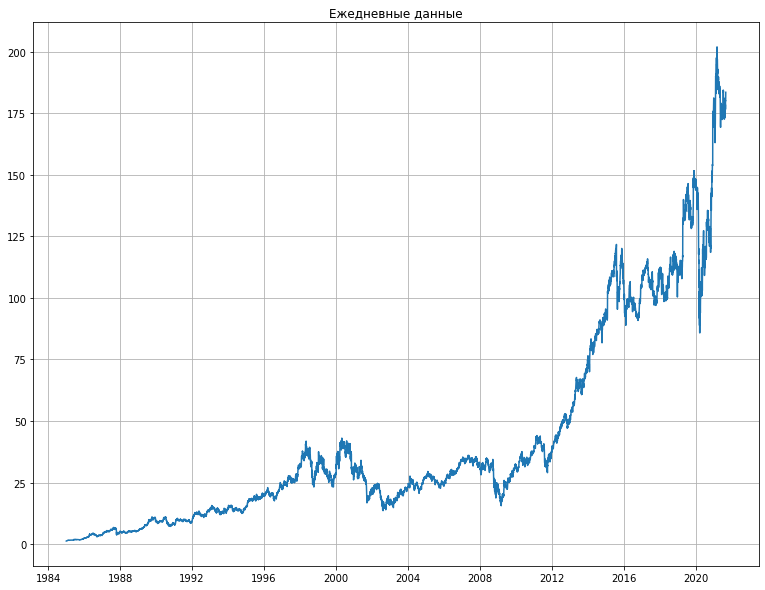

In [13]:
plt.figure(figsize=(13, 10))
plt.plot(disney.Date, disney.Close)
plt.title('Ежедневные данные')
plt.grid();

In [14]:
#disney['Year'] = pd.DatetimeIndex(disney['Date']).year
disney_by_year = disney.groupby('Year', as_index=False).agg({'Close': 'mean'})
#disney_by_year.Year = pd.to_datetime(disney_by_year.Year, format="%Y")
disney_by_year.head()

,Year,Close
0,1985,1.752167
1,1986,3.438423
2,1987,5.251870
3,1988,5.055528
4,1989,8.218060


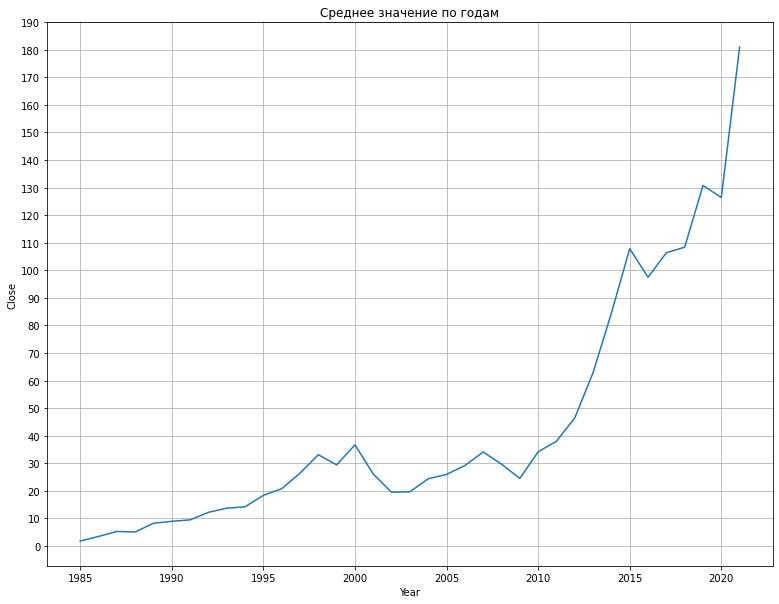

In [15]:
plt.figure(figsize=(13, 10))
sns.lineplot(x=disney_by_year.Year, y=disney_by_year.Close)
plt.grid()
plt.title('Среднее значение по годам')
plt.yticks(np.arange(0, max(disney_by_year.Close) + 10, 10));

## Полулогарифмический график

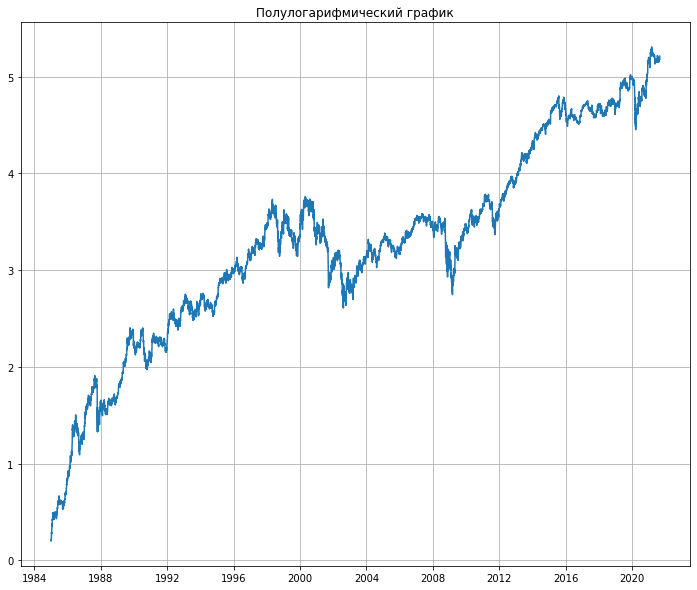

In [16]:
plt.figure(figsize=(12, 10))
plt.semilogy(disney.Date, disney.Close, base=np.exp(1))
plt.title('Полулогарифмический график')
plt.grid()

labels = np.arange(6)
points = np.exp(labels)
plt.yticks(points, labels);

## График 1/y

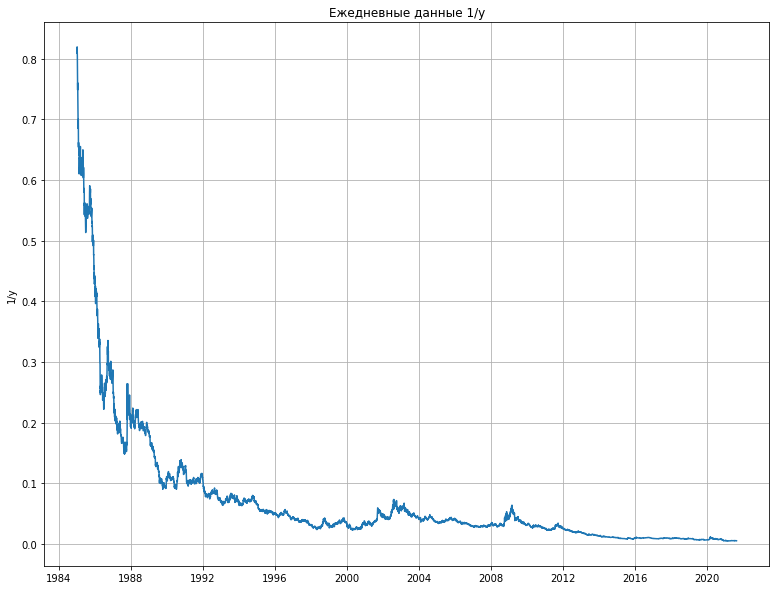

In [17]:
plt.figure(figsize=(13, 10))
plt.plot(disney.Date, 1 / disney.Close)
plt.title('Ежедневные данные 1/y')
plt.ylabel('1/y')
plt.grid();

## Участки завершения интенсивного роста (1/y)

In [18]:
def revers_segment(x1, x2, y2, y1=0): # x в формате '2020-01-01'
    plt.figure(figsize=(13, 10))
    plt.plot(disney.Date, 1 / disney.Close)
    plt.title('Ежедневные данные 1/y')
    plt.grid()
    lim = (datetime.strptime(x1, "%Y-%m-%d"), 
           datetime.strptime(x2, "%Y-%m-%d"))
    plt.xlim(lim)
    plt.ylim(y1, y2);

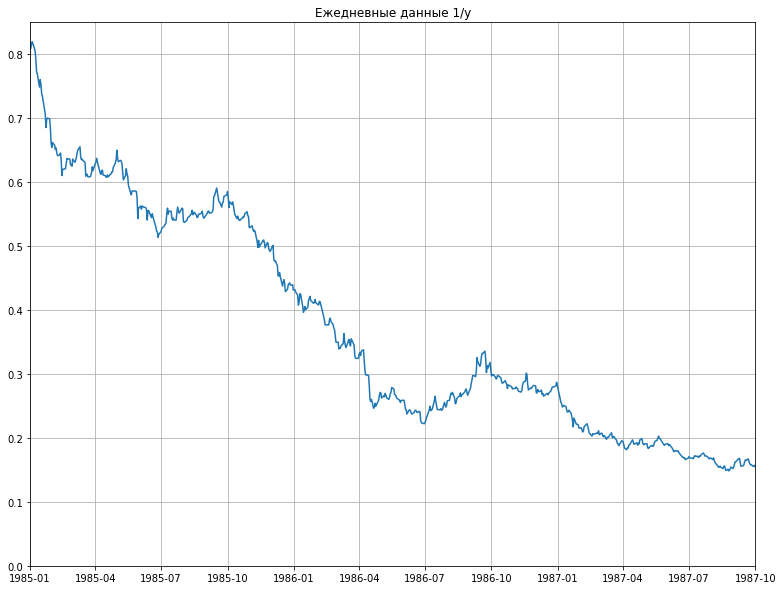

In [19]:
revers_segment(x1='1985-01-01', x2='1987-10-01', y2=0.85)

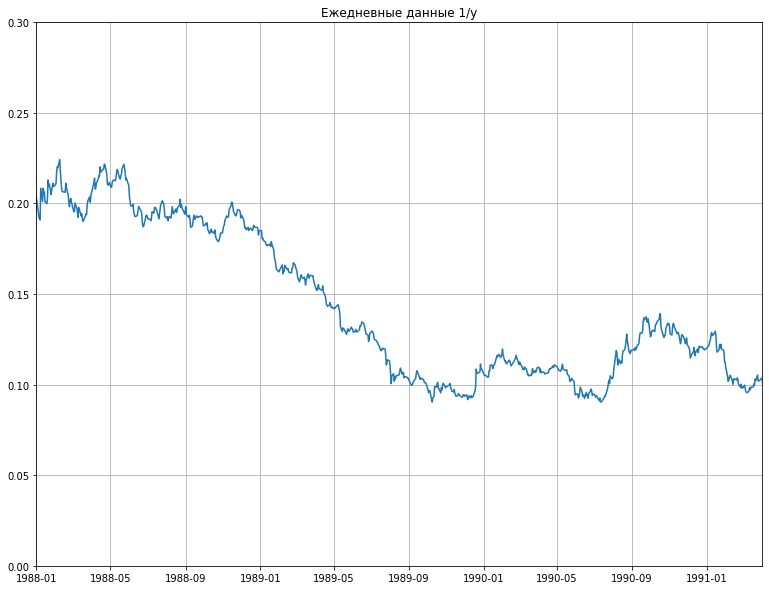

In [20]:
revers_segment(x1='1988-01-01', x2='1991-04-01', y2=0.3)

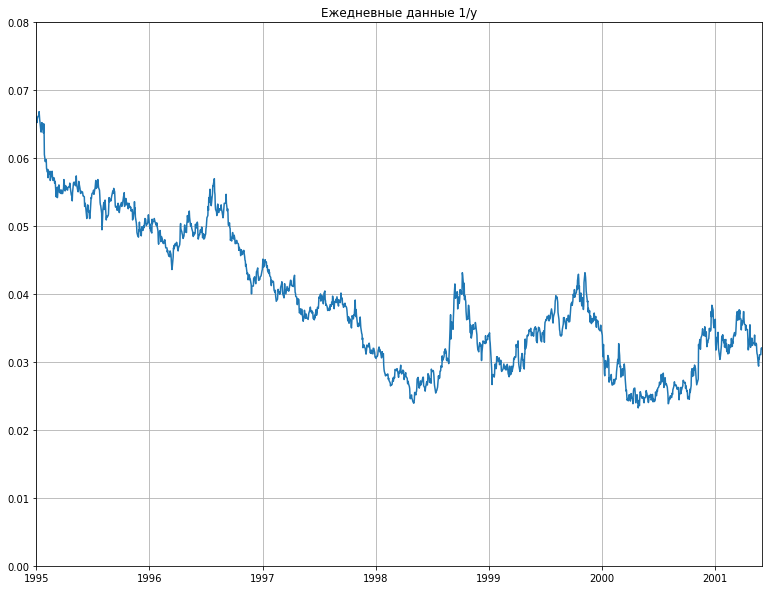

In [21]:
revers_segment(x1='1995-01-01', x2='2001-06-01', y2=0.08)

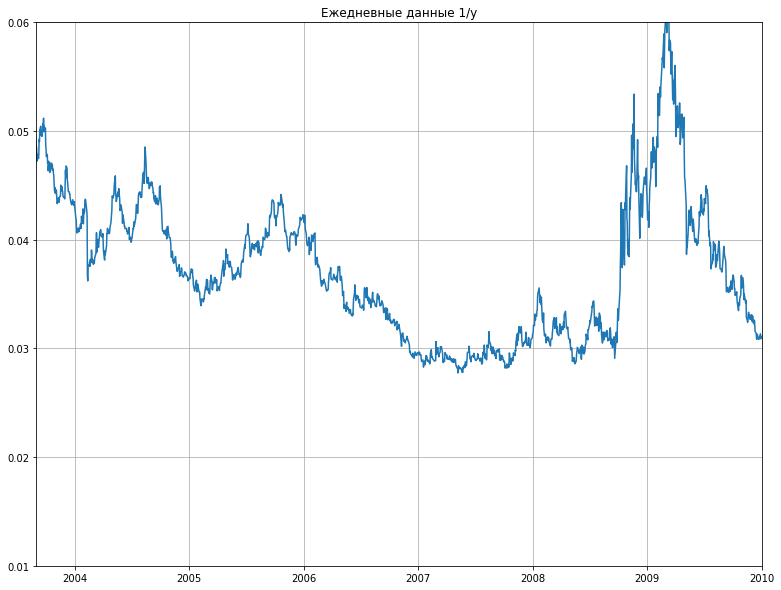

In [22]:
revers_segment(x1='2003-09-01', x2='2010-01-01', y1=0.01, y2=0.06)

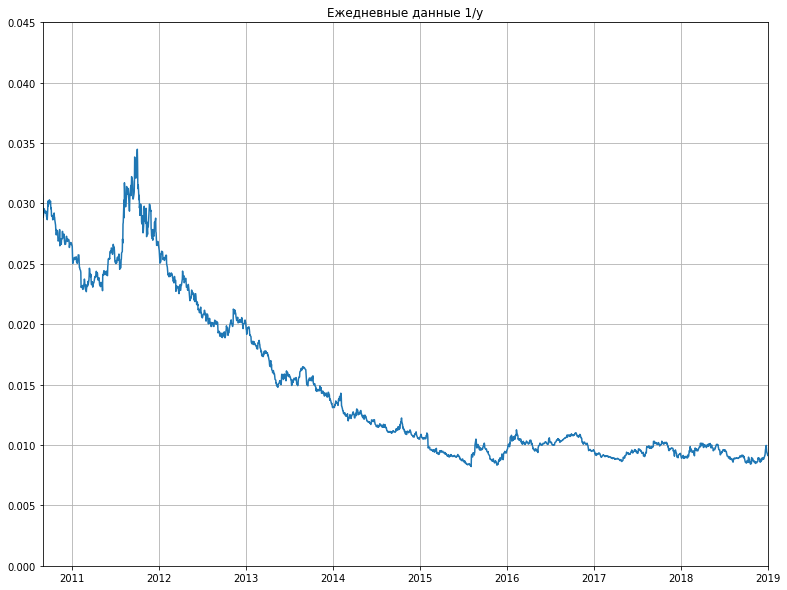

In [23]:
revers_segment(x1='2010-09-01', x2='2019-01-01', y2=0.045)

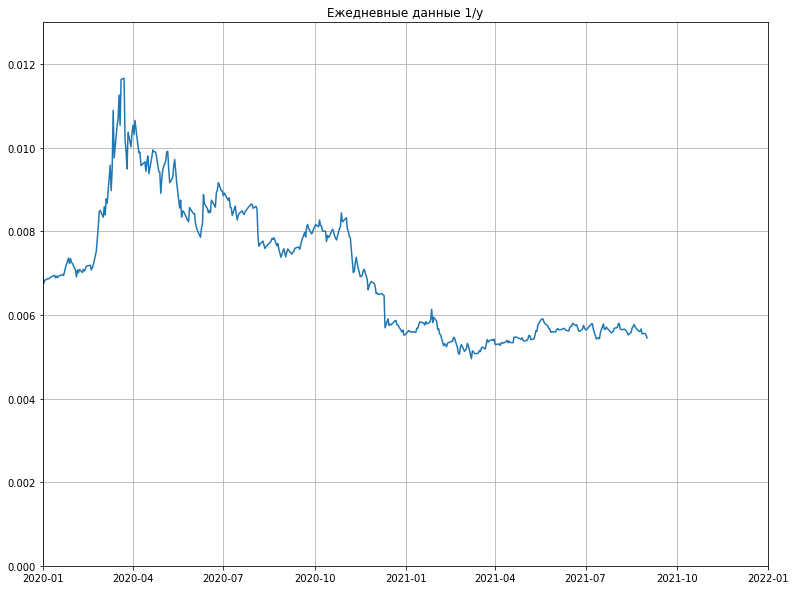

In [24]:
revers_segment(x1='2020-01-01', x2='2022-01-01', y2=0.013)

## Поиск конца интенсивного роста на участках

In [25]:
def segment_semilog(t0, t1, y2, y1=0): # t0 и t1 в формате '2020-01-01'
    y0 = disney.query('Date == @t0').Close.values
    print('y0 = ', y0)

    t0 = disney.query('Date == @t0').t.values
    print('t0 = ', t0)
    t1 = disney.query('Date == @t1').t.values
    
    plt.figure(figsize=(12, 10))
    plt.plot((disney.t - t0) ** 2, np.log(disney.Close / y0))
    plt.grid()
    plt.ylabel('ln(y / y0)')
    plt.xlabel('(t - t0)^2')
    plt.xlim(0, (t1 - t0)** 2 + 10000 * y0)
    plt.vlines((t1 - t0)** 2, -1, 5, color = 'r', linestyle='--')
    plt.ylim(y1, y2);

y0 =  [1.813721]
t0 =  [170]


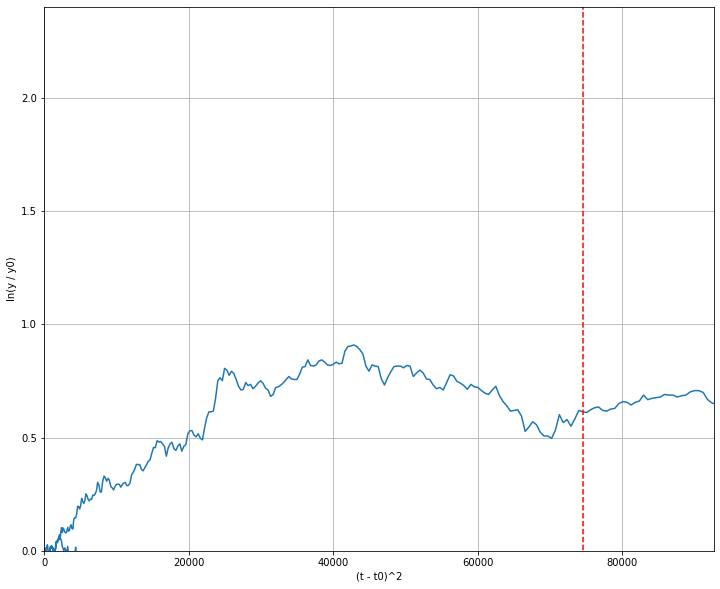

In [26]:
segment_semilog(t0='1985-09-03', t1='1986-10-02', y2=2.4)

1986: ln(y/y0) = 1.5

y0 =  [5.384646]
t0 =  [970]


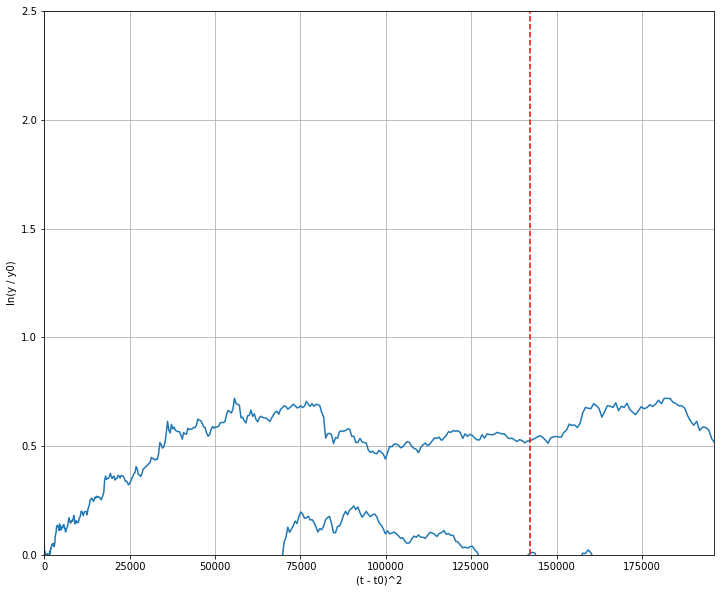

In [27]:
segment_semilog(t0='1988-11-01', t1='1990-05-01', y2=2.5)

1990: ln(y/y0) = 1.65

y0 =  [40.]
t0 =  [6833]


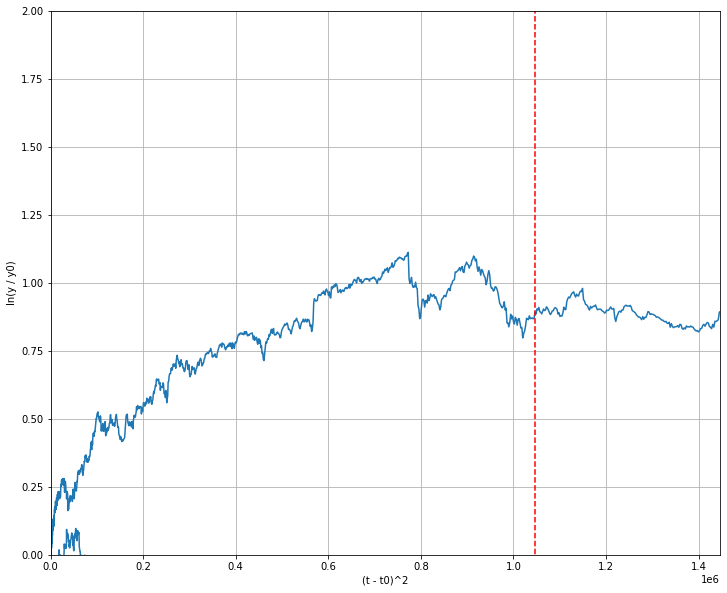

In [28]:
segment_semilog(t0='2012-02-03', t1='2016-03-01', y2=2)

2016: ln(y/y0) = 1.30

## Графики с накопленной суммой y и нач. значениями y*
### ln(y*/y_накоп) от t

In [29]:
y_cumsum = disney.Close.cumsum()

In [30]:
def segment_log_ycs_y(t1, t2, y1, y2=0): # t0 и t1 в формате '2020-01-01'
    lim = (datetime.strptime(t1, "%Y-%m-%d"), 
           datetime.strptime(t2, "%Y-%m-%d"))
    
    plt.figure(figsize=(12, 10))
    plt.plot(disney.Date, np.log(disney.Close / y_cumsum))
    plt.grid()
    plt.ylabel('ln(y*/y)')
    plt.xlabel('Date')
    plt.xlim(lim)
    plt.ylim(y1, y2);

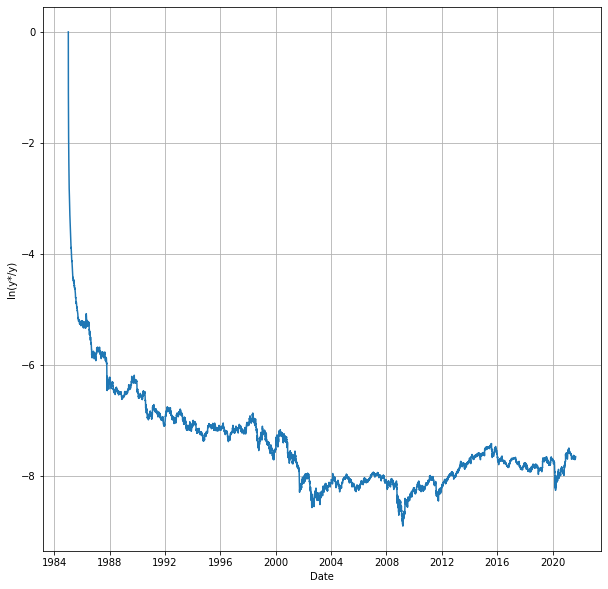

In [31]:
# по всем данным
plt.figure(figsize=(10, 10))
plt.plot(disney.Date, np.log(disney.Close / y_cumsum))
plt.grid()
plt.ylabel('ln(y*/y)')
plt.xlabel('Date');
#plt.ylim(-9, -4);

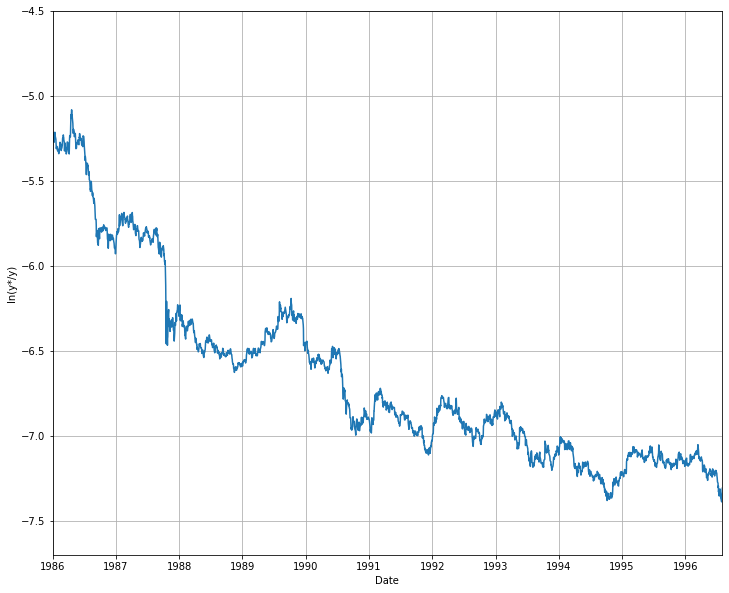

In [32]:
segment_log_ycs_y(t1='1986-01-01', t2='1996-08-01', y1=-7.7, y2=-4.5)

k = 2/2071 = 0.0009  
log(0.0009) = -7.013  
t* = 1992-01-01

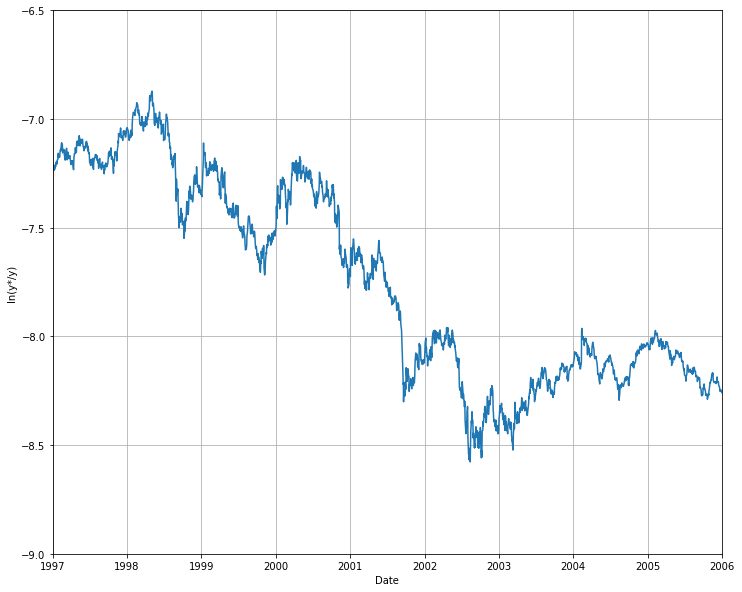

In [33]:
segment_log_ycs_y(t1='1997-01-01', t2='2006-01-01', y1=-9, y2=-6.5)

нижний:  
k = 1/1430 = 0.00069  
log(0.00069) = -7.278  
t* = 1997-10-01

верхний:  
k = 1/1308 = 0.00076  
log(0.00076) = -7.18  
t* = 2000-03-01

### y*/y_накоп от ln y_накоп

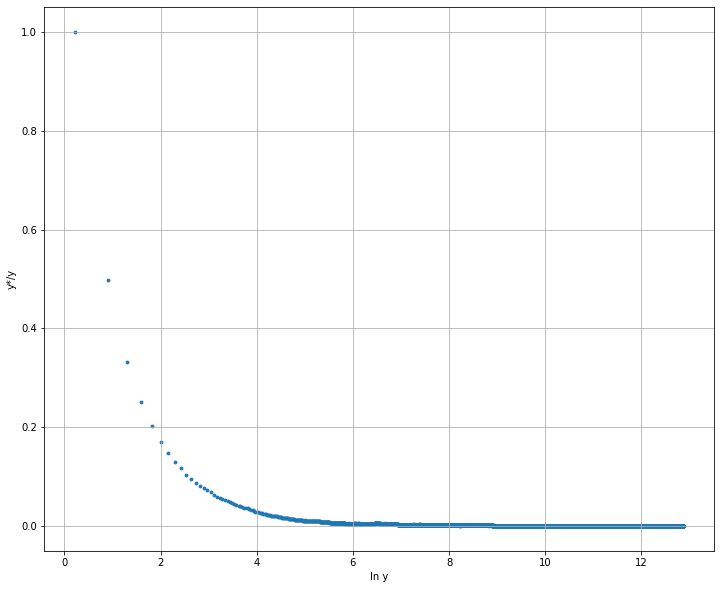

In [34]:
plt.figure(figsize=(12, 10))
plt.scatter(np.log(y_cumsum), disney.Close / y_cumsum, s=8)
plt.grid()
plt.xlabel('ln y')
plt.ylabel('y*/y');

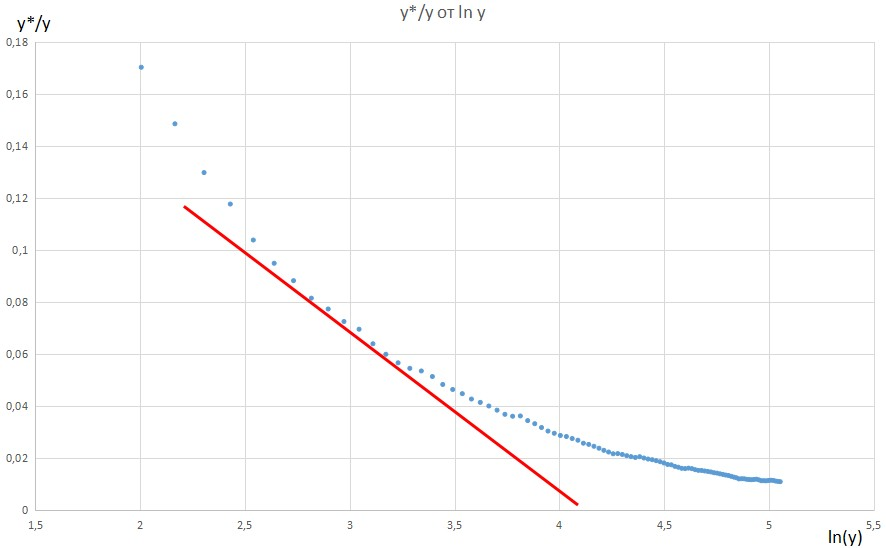

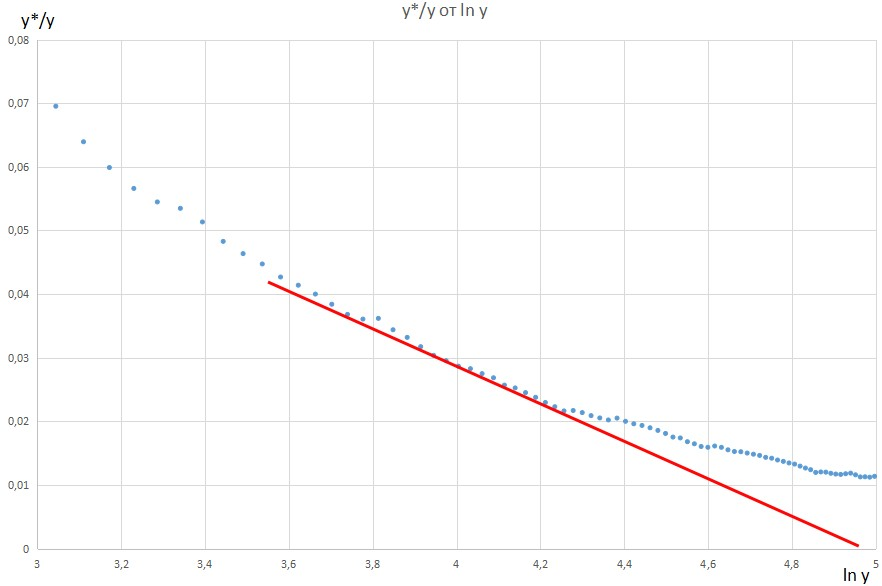

### 9-10 недели. Исключение тренда

C:\Users\PC6\AppData\Local\Temp/ipykernel_14700/1076904439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['m'] = m


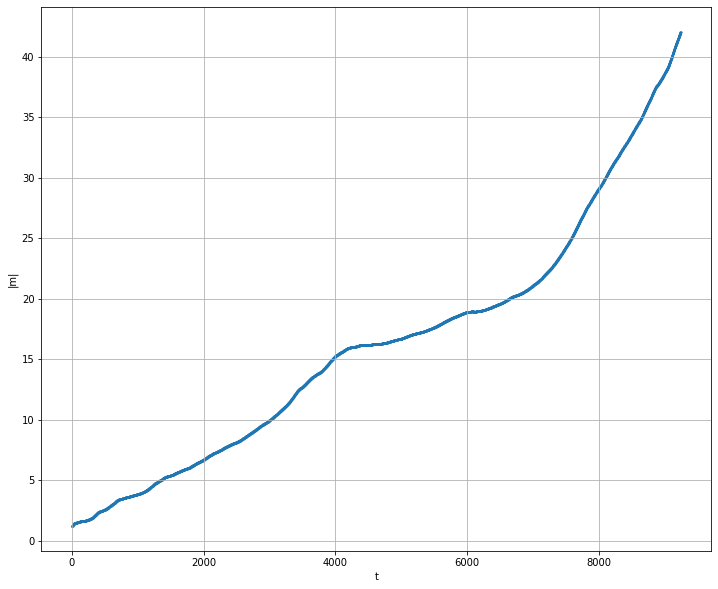

In [35]:
m = np.abs(y_cumsum / disney.t) 

disney['m'] = m
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, m, s=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('|m|');

In [36]:
tooltips = [('|m|', '@m'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = '|m|', plot_width=800, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='m', source=disney, legend_label="|m|", size=2)
show(fig)

In [37]:
delta_t = 240
# disney.Close.shift(delta_t) = y от (t - delta_t)
S = (disney.Close.shift(delta_t) + disney.Close.shift(-delta_t)) / (2 * disney.Close)
disney['ln_S'] = np.log(S)

C:\Users\PC6\AppData\Local\Temp/ipykernel_14700/3265215433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['ln_S'] = np.log(S)


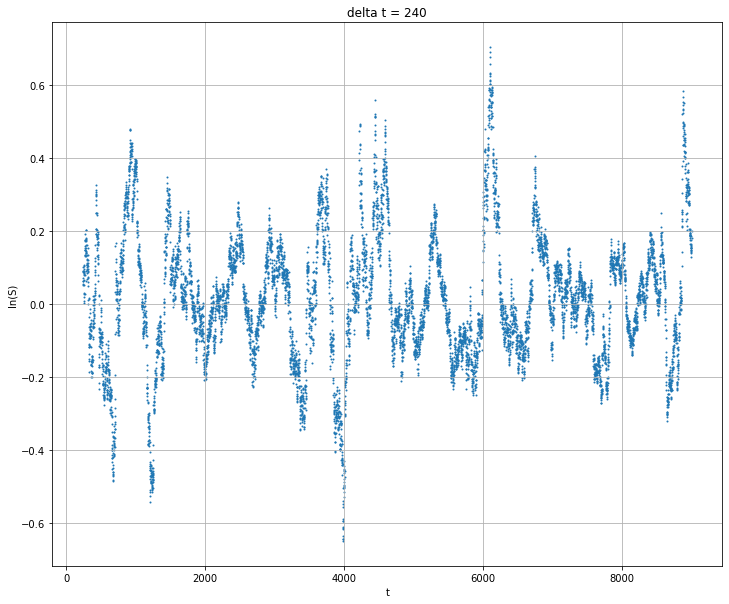

In [38]:
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, disney.ln_S, s=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(S)')
plt.title('delta t = ' + str(delta_t));

In [39]:
tooltips = [('ln(S)', '@ln_S'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln(S)', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_S', source=disney, legend_label="ln(S)", size=2)
show(fig)

In [40]:
P = (disney.Close.shift(delta_t) * disney.Close.shift(-delta_t)) / disney.Close**2
disney['ln_P'] = np.log(P)

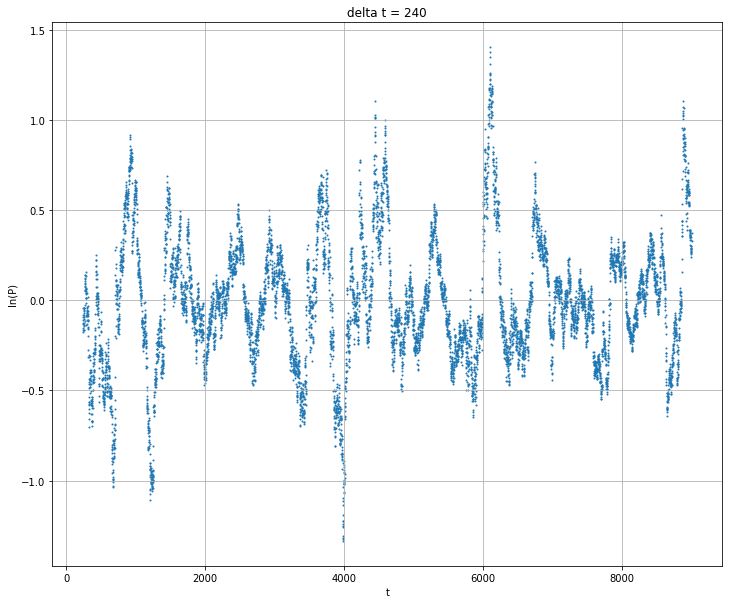

In [41]:
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, disney.ln_P, s=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(P)')
plt.title('delta t = ' + str(delta_t));

In [42]:
tooltips = [('ln(P)', '@ln_P'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln(P)', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_P', source=disney, legend_label="ln(P)", size=2)
show(fig)

In [43]:
n = disney.shape[0]
def get_p(delta):
    trend = disney.reset_index()
    a = np.array(trend.Close[:n - 2*delta])
    b = np.array(trend.Close[2 * delta:])
    c = np.array(trend.Close[delta:n - delta] **2)
    p = (a*b)/c
    return p

a_tau = [0] * (n-2)
p = get_p(delta_t)
length = len(p)

for tau in range(1, length - 2):
    a_tau[tau] = 1 / (length - tau) * np.sum(np.abs(p[tau + 1:length] - p[1:length - tau]))

In [44]:
#borders = [0, 723, 1535, 2156, 2780, 3660, 4370, 5250, 6000, 6405, 6960, 7440, 8000]
borders = [0, 723, 5280, 5955]

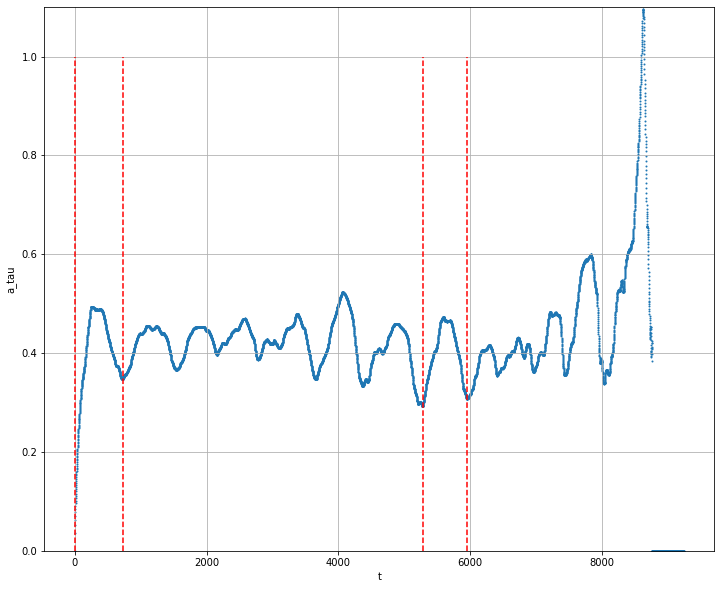

In [45]:
plt.figure(figsize=(12, 10))
plt.scatter(disney.t.iloc[:9241], a_tau, s=1)
plt.grid()
plt.xlabel('t')
plt.ylim(0, 1.1)
plt.ylabel('a_tau')
for border in borders:
    plt.vlines(border, 0, 1, color = 'r', linestyle='--');

In [46]:
disney['a_tau'] = [None] * n
disney.loc[:9240, 'a_tau'] = a_tau

In [47]:
tooltips = [('a_tau', '@a_tau'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'a_tau', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='a_tau', source=disney, legend_label="a_tau", size=2)
for border in borders:
    time_line = Span(location=border, dimension='height', line_color='red', line_dash='dashed', line_width=2)
    fig.add_layout(time_line)
    
show(fig)

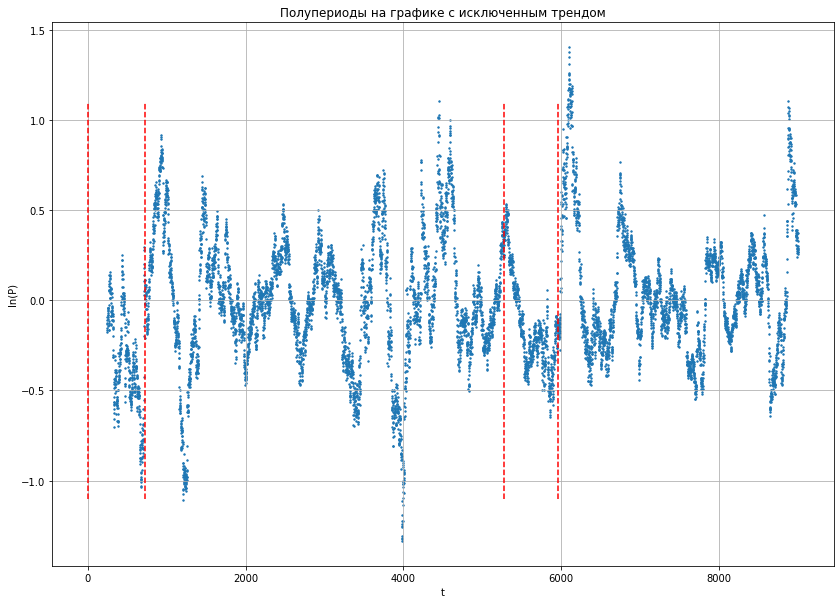

In [48]:
plt.figure(figsize=(14, 10))
plt.scatter(disney.t, disney.ln_P, s=2)
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(P)')
plt.title('Полупериоды на графике с исключенным трендом')
for border in borders:
    plt.vlines(border, -1.1, 1.1, color = 'r', linestyle='--');

In [49]:
tooltips = [('ln(P)', '@ln_P'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln(P)', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_P', source=disney, legend_label="ln(P)", size=2)
for border in borders:
    time_line = Span(location=border, dimension='height', line_color='red', line_dash='dashed', line_width=2)
    fig.add_layout(time_line)
show(fig)

In [59]:
borders_semilog = [723, 2400, 4400, 6100, 8100]

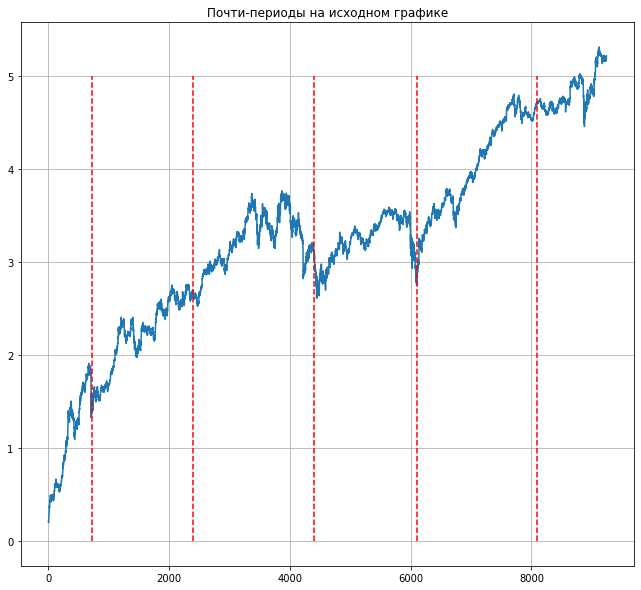

In [60]:
plt.figure(figsize=(11, 10))
plt.plot(disney.t, np.log(disney.Close))
plt.title('Почти-периоды на исходном графике')
plt.grid()
for border in borders_semilog:
    plt.vlines(border, 0, 5, color = 'r', linestyle='--');

положение 0 геометрической прогрессии:

In [61]:
(6100-723) / 19 * 20

5660.0

In [62]:
polozhenie_0 = 6100 - 5660
polozhenie_0

440

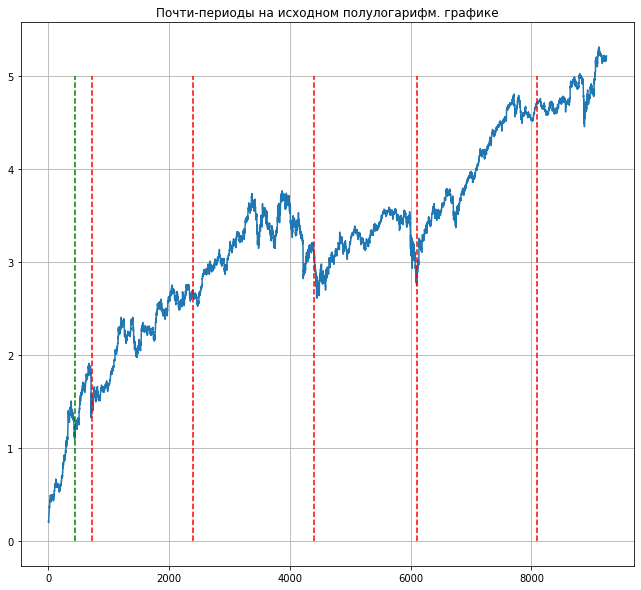

In [76]:
plt.figure(figsize=(11, 10))
plt.plot(disney.t, np.log(disney.Close))
plt.title('Почти-периоды на исходном полулогарифм. графике')
plt.grid()
for border in borders_semilog:
    plt.vlines(border, 0, 5, color = 'r', linestyle='--')
plt.vlines(polozhenie_0, 0, 5, color = 'g', linestyle='--');

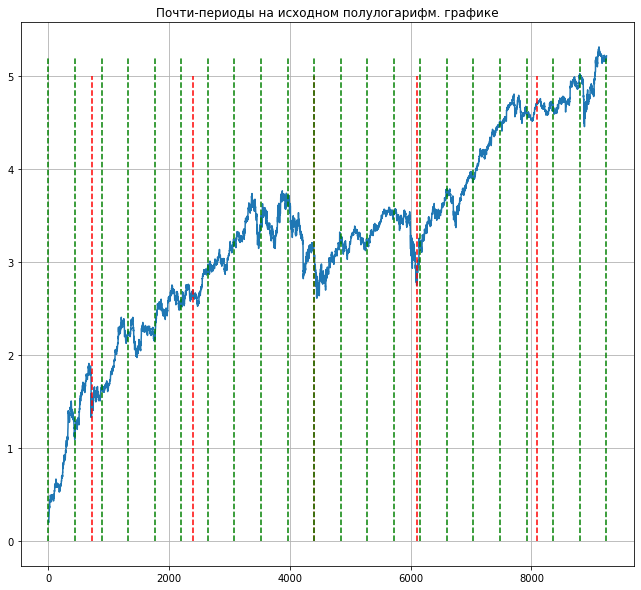

In [78]:
plt.figure(figsize=(11, 10))
plt.plot(disney.t, np.log(disney.Close))
plt.title('Почти-периоды на исходном полулогарифм. графике')
plt.grid()
for border in borders_semilog:
    plt.vlines(border, 0, 5, color = 'r', linestyle='--')
for i in range(22):
    plt.vlines(polozhenie_0 * i, 0, 5.2, color = 'g', linestyle='--');

In [72]:
disney['ln_y'] = np.log(disney.Close)

tooltips = [('ln y', '@ln_y'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln y', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_y', source=disney, legend_label="ln y", size=2)
for border in borders_semilog:
    time_line = Span(location=border, dimension='height', line_color='red', line_dash='dashed', line_width=2)
    fig.add_layout(time_line)
    
for i in range(22):
    time_line = Span(location=polozhenie_0 * i, dimension='height', line_color='green', line_dash='dashed', line_width=2)
    fig.add_layout(time_line)
    
show(fig)